![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Tokenización de textos  

En este taller podrán poner en práctica sus conocimientos sobre preprocesamiento de texto (tokenización). El taller está constituido por 5 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos detección de toxicidad en comentarios

En este taller se usará el conjunto de datos de detección de toxicidad en comentarios de la base de datos de Kaggle. Cada observación es un comentario que tiene como variable objetivo (target) la probabilidad de ser un comentario tóxico. El objetivo es predecir la toxicidad de cada comentario. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/c/jigsaw-unintended-bias-in-toxicity-classification/data).

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Importación librerías
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import metrics
%matplotlib inline

In [6]:
# Carga de datos de archivos .csv
df = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/Toxicity.zip')
df = df[['id','comment_text', 'target']]
df.head()

,id,comment_text,target
0,6101457,What are you talking about? What group do Pete...,0.0
1,5342103,"NO!, Let him, we need a Conservative government.",0.0
2,743361,"Perhaps he took the ""power out of the Cardinal...",0.2
3,551008,"As always, yours is dripping with sarcasm, whi...",0.0
4,865998,The dirty little secret is that the price rang...,0.3


In [7]:
# Impresión histograma de variable de interés (y)
df.target.hist()

<Axes: >

In [8]:
# Separación de variable de interés (y)
y = df.target
y.describe()

count    541462.000000
mean          0.102991
std           0.196979
min           0.000000
25%           0.000000
50%           0.000000
75%           0.166667
max           1.000000
Name: target, dtype: float64

In [9]:
# Separación de variables predictoras (X), solo se considera el texto de la noticia
X = df.comment_text

In [10]:
# Separación de datos en set de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Punto 1 - Tokenización con CountVectorizer

En la celda 1 creen y entrenen el modelo de regresión de su preferencia, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Celda 1
vectorizer = CountVectorizer()

X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)
model = LinearRegression()
model.fit(X_train_vec, y_train)
y_pred = model.predict(X_test_vec)
mse = mean_squared_error(y_test, y_pred)
print(f"Error cuadrático medio (MSE): {mse:.4f}")


Error cuadrático medio (MSE): 0.0372


## Punto 2 - Tokenización con CountVectorizer y trigramas

En la celda 2 creen y entrenen el mismo modelo de regresión del punto anterior (es decir si usaron un RandomForestRegresor usen nuevamente ese regresor), para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer **considerando trigramas** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [14]:
# Celda 2
# Punto 2 - Tokenización con CountVectorizer y trigramas

vectorizer_tri = CountVectorizer(ngram_range=(3, 3))
X_train_vec_tri = vectorizer_tri.fit_transform(X_train)
X_test_vec_tri = vectorizer_tri.transform(X_test)
model_tri = LinearRegression()
model_tri.fit(X_train_vec_tri, y_train)
y_pred_tri = model_tri.predict(X_test_vec_tri)
mse_tri = mean_squared_error(y_test, y_pred_tri)
print(f"Error cuadrático medio (MSE) usando trigramas: {mse_tri:.4f}")


Error cuadrático medio (MSE) usando trigramas: 0.0398


## Punto 3 - TfidfVectorizer

Investigen sobre la función TfidfVectorizer. En la celda de texto 3, expliquen en qué consiste esta técnica de tokenización (describanla y expliquen su funcionamiento) y cúales son las ventajas o deventajas de su uso al compararlo con la función CountVectorizer.

#Celda 3
## ¿Qué es TF-IDF?

**TF (Term Frequency)** mide la frecuencia de un término en un documento.

**IDF (Inverse Document Frequency)** mide la importancia de un término en el conjunto de documentos.

La fórmula general de **TF-IDF** es:

$$
\text{TF-IDF}(t,d) = \text{TF}(t,d) \times \text{IDF}(t)
$$

### Cálculo de **TF** (Term Frequency):

$$
\text{TF}(t,d) = \frac{\text{Número de veces que aparece } t \text{ en } d}{\text{Total de términos en } d}
$$

### Cálculo de **IDF** (Inverse Document Frequency):

$$
\text{IDF}(t) = \log \left( \frac{\text{Número total de documentos}}{\text{Número de documentos que contienen } t} \right)
$$

---


**¿Cómo funciona?**

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Lista de documentos de texto
documents = [
    "Me gusta el machine learning",
    "El aprendizaje automático es fascinante",
    "Machine learning y deep learning son áreas emocionantes"
]

# Crear el vectorizador TF-IDF
vectorizer = TfidfVectorizer()

# Ajustar el vectorizador y transformar los documentos
X = vectorizer.fit_transform(documents)

# Convertir a un arreglo denso para visualizarlo
print(X.toarray())

# Ver el vocabulario aprendido por el vectorizador
print(vectorizer.get_feature_names_out())


[[0.         0.         0.         0.3935112  0.         0.
  0.         0.51741994 0.3935112  0.3935112  0.51741994 0.
  0.        ]
 [0.46735098 0.46735098 0.         0.35543247 0.         0.46735098
  0.46735098 0.         0.         0.         0.         0.
  0.        ]
 [0.         0.         0.38091445 0.         0.38091445 0.
  0.         0.         0.57939052 0.28969526 0.         0.38091445
  0.38091445]]
['aprendizaje' 'automático' 'deep' 'el' 'emocionantes' 'es' 'fascinante'
 'gusta' 'learning' 'machine' 'me' 'son' 'áreas']


## Punto 4 - Tokenización con TfidfVectorizer

En la celda 4 creen y entrenen el mismo modelo de regresión del primer punto, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Procesen los comentarios con la función **TfidfVectorizer** y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [18]:
# Punto 4 
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import mean_squared_error

modelo = RandomForestRegressor(n_estimators=20, max_depth=10, n_jobs=-1, random_state=42)
tfidf_vectorizer = TfidfVectorizer(max_features=10000)  # Limitar a 10,000 palabras más importantes
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)
modelo.fit(X_train_tfidf, y_train)
y_pred_tfidf = modelo.predict(X_test_tfidf)
mse_tfidf = mean_squared_error(y_test, y_pred_tfidf)

print(f'MSE usando TfidfVectorizer optimizado: {mse_tfidf:.4f}')


MSE usando TfidfVectorizer optimizado: 0.0305


## Punto 5 - Comparación y análisis de resultados

En la celda 5 comparen los resultados obtenidos de los diferentes modelos y comenten cómo el preprocesamiento de texto afecta el desempeño.

Resultados de los modelos:


,MSE
CountVectorizer (unigramas),0.0372
CountVectorizer (trigramas),0.0398
TfidfVectorizer (optimizado),0.0305


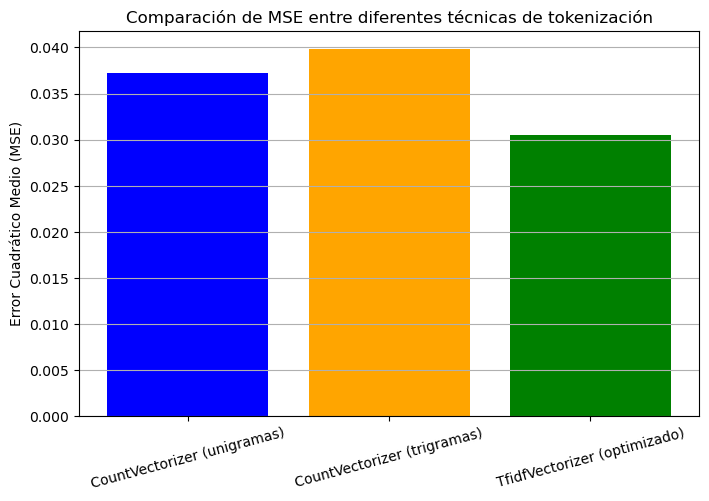

In [49]:
# Celda 5
import matplotlib.pyplot as plt

# Resultados obtenidos
resultados = {
    'CountVectorizer (unigramas)': 0.0372,
    'CountVectorizer (trigramas)': 0.0398,
    'TfidfVectorizer (optimizado)': 0.0305
}

# Mostrar tabla de resultados
import pandas as pd

df_resultados = pd.DataFrame.from_dict(resultados, orient='index', columns=['MSE'])
print("Resultados de los modelos:")
display(df_resultados)

plt.figure(figsize=(8,5))
plt.bar(df_resultados.index, df_resultados['MSE'], color=['blue', 'orange', 'green'])
plt.title('Comparación de MSE entre diferentes técnicas de tokenización')
plt.ylabel('Error Cuadrático Medio (MSE)')
plt.xticks(rotation=15)
plt.grid(axis='y')
plt.show()

### Análisis:

- El modelo que utilizó TfidfVectorizer (optimizado) alcanzó el mejor desempeño, con el MSE más bajo (0.0305).
- El modelo con CountVectorizer (unigramas) obtuvo un MSE de 0.0372, un poco peor que el de TF-IDF.
- El peor desempeño se observó al usar CountVectorizer con trigramas (MSE de 0.0398).

Interpretación:

- La técnica de TfidfVectorizer es más eficiente porque no solo cuenta palabras, sino que también pondera su importancia
  según su frecuencia en el documento y en el corpus general, eliminando ruido de palabras muy comunes.

- Al usar trigramas, el modelo genera muchas más variables poco frecuentes, lo que puede introducir ruido,
  sobreajuste y afectar el desempeño.

### Conclusión:

- El preprocesamiento de texto influye de manera significativa en el rendimiento predictivo.
- Técnicas que capturan mejor la relevancia semántica de las palabras (como TF-IDF) pueden ayudar
  a mejorar los resultados frente a métodos más simples como el conteo de palabras o n-gramas grandes.
"""